# Domain: Social Network
Project 05: Facebook data
Dataset contains pseudo Facebook data.

Attribute Information:
Userid : ID of user
Age : User’s age(years)
dob_day : Day of date of birth(1-31)
dob_year : Year of date of birth 
dob_month : Month of date of birth 
gender : M/F
tenure : How long have facebook users been on site
friend_count : Total number of friends 
friendships_initiated : Friend requests sent
likes : Total number of likes by user
likes_received : Total number of likes received by user 
mobile_likes : Number of likes by user(through mobile)
mobile_likes_received : Number of likes recieved by user(through mobile) 
www_likes : Number of likes by user(through desktop website) 
www_likes_received : Number of likes received by user(through desktop)
    
Exploration ideas:
Date of birth analysis Friend count analysis
Tenure analysis
Data transformations
Frequency polygons, Boxplots.

In [1]:
#Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
#Read the input file in variable facebook

path = 'C:/Users/Vasu/Desktop/Vasu/LEARNING/data Analytics/UPX/Projects/Project5_Facebook/pseudo_facebook.tsv'
fb = pd.read_csv(path,sep='\t',parse_dates=[[3,4,2]])
fb.tail()

,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945-04-04,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995-03-12,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998-05-10,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990-04-11,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974-05-15,1397896,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [3]:
#facebook variable no of rows and columns
fb.shape

(99003, 13)

In [4]:
#Renaming the date of birth coumn to shorter name as DOB and further setting index of te dataframe as userid

fb.rename(columns = {'dob_year_dob_month_dob_day':'DOB'},inplace=True)
fb = fb.set_index('userid')
fb.head()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,
2094382,1999-11-19,14,male,266.0,0,0,0,0,0,0,0,0
1192601,1999-11-02,14,female,6.0,0,0,0,0,0,0,0,0
2083884,1999-11-16,14,male,13.0,0,0,0,0,0,0,0,0
1203168,1999-12-25,14,female,93.0,0,0,0,0,0,0,0,0
1733186,1999-12-04,14,male,82.0,0,0,0,0,0,0,0,0


In [5]:
#Use describe function to see the various aspects of facebbok data

fb.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [6]:
#Lets try for Q02

fb['tenure_yrs']=fb['tenure']/365
fb['tenure_yrs']=fb['tenure_yrs'].apply(np.ceil)
fb_males = fb[fb['gender']=='male']
fb_females = fb[fb['gender']=='female']
fb_males_fr_count = fb_males[['tenure_yrs','friend_count']]
fb_females_fr_count = fb_females[['tenure_yrs','friend_count']]
fb_males_fr_count = fb_males_fr_count.groupby('tenure_yrs').mean().unstack().reset_index()
fb_females_fr_count = fb_females_fr_count.groupby('tenure_yrs').mean().unstack().reset_index()
fb_females_fr_count

,level_0,tenure_yrs,0
0,friend_count,0.0,0.086957
1,friend_count,1.0,159.238308
2,friend_count,2.0,279.340967
3,friend_count,3.0,339.905537
4,friend_count,4.0,332.449821
5,friend_count,5.0,303.261501
6,friend_count,6.0,276.199271
7,friend_count,7.0,329.738854
8,friend_count,8.0,493.300000
9,friend_count,9.0,1365.000000


In [7]:
fb_males_fr_count

,level_0,tenure_yrs,0
0,friend_count,0.0,4.361702
1,friend_count,1.0,102.249633
2,friend_count,2.0,189.537862
3,friend_count,3.0,252.931858
4,friend_count,4.0,301.080617
5,friend_count,5.0,269.188900
6,friend_count,6.0,306.208539
7,friend_count,7.0,295.822222
8,friend_count,8.0,488.250000
9,friend_count,9.0,928.000000


In [8]:
fb_males_fr_count['avg_yr_fr_count']= fb_males_fr_count[0]/fb_males_fr_count['tenure_yrs']
fb_females_fr_count['avg_yr_fr_count']= fb_females_fr_count[0]/fb_females_fr_count['tenure_yrs']
fb_females_fr_count
#fb_males_fr_count

,level_0,tenure_yrs,0,avg_yr_fr_count
0,friend_count,0.0,0.086957,inf
1,friend_count,1.0,159.238308,159.238308
2,friend_count,2.0,279.340967,139.670484
3,friend_count,3.0,339.905537,113.301846
4,friend_count,4.0,332.449821,83.112455
5,friend_count,5.0,303.261501,60.652300
6,friend_count,6.0,276.199271,46.033212
7,friend_count,7.0,329.738854,47.105551
8,friend_count,8.0,493.300000,61.662500
9,friend_count,9.0,1365.000000,151.666667


In [9]:
fb_males_fr_count=fb_males_fr_count[['tenure_yrs','avg_yr_fr_count']]
fb_females_fr_count=fb_females_fr_count[['tenure_yrs','avg_yr_fr_count']]

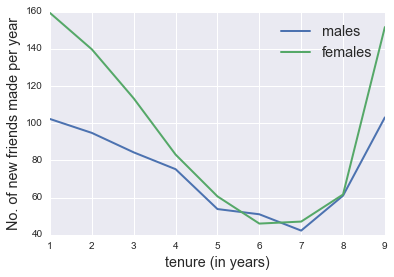

In [11]:
fb_fr_counts = pd.merge(fb_males_fr_count,fb_females_fr_count,on='tenure_yrs')
fb_fr_counts.columns=['tenure','males','females']
plt.plot(fb_fr_counts[['males','females']],linewidth=2.0)
plt.xlabel('tenure (in years)',fontsize = 'x-large')
plt.ylabel('No. of new friends made per year',fontsize = 'x-large')
plt.legend(['males','females'],loc='upper right',fontsize = 'x-large')
plt.show()

Conclusion - Irrespective of gender the average new friends made every goes on decreasing year by year...But hold on..there is some strange magic happens after 6/7 th year, because right after this year the new friends count made every year goes not increasing. And after 8th year, graph seems to be shooting up exponentially for both genders.
Special year for males in the 6th year, where the graph for males is above than the females which is very unlikely for rest of the periods. :)